# Metrics Comparison

We considered 4 different metrics.
- Engagement: The sum of post clicks, post likes, post comments and post shares.
- Link Clicks: The total number of post link clicks
- Engagement to Reach Ratio: Engagement normalized by Reach(or Impressions: The total number of people your Page post was served to.)
- Link Clicks to Reach Ratio: Link clicks normalized by Reach(or Impressions: The total number of people your Page post was served to.)

Earlier, we performed a detailed exploratory data analysis based on each of these features as the metric. 

Here we compare the features as such.

In [1]:
%run ../import.py

In [2]:
data_pd_format = pd.read_csv('../clean_data/data_with_features.csv')

In [3]:
sum(data_pd_format.link_buckets == data_pd_format.link_to_reach_buckets)/float(len(data_pd_format.link_to_reach_buckets))

0.88335667897618741

In [4]:
pearsonr(data_pd_format.link_clicks,data_pd_format.link_to_reach)

(0.48503176984810431, 0.0)

- 88% of the data has consistent 'high'/'low' ratings based on both 'link clicks' and 'link clicks to reach ratio' metrics
- 'link clicks' and 'link clicks to reach ratio' have a correlation of 0.48

In [5]:
sum(data_pd_format.engagement_buckets == data_pd_format.engagement_to_reach_buckets)/float(len(data_pd_format.link_to_reach_buckets))

0.85317712975932769

In [6]:
pearsonr(data_pd_format.engagement,data_pd_format.engagement_to_reach)

(0.38771894296127368, 4.4227774912713688e-280)

- 85% of the data has consistent 'high'/'low' ratings based on both 'engagement' and 'engagement to reach ratio' metrics
- 'Engagement' and 'engagement to reach' have a correlation of 0.39

In [7]:
sum(data_pd_format.link_buckets == data_pd_format.engagement_buckets)/float(len(data_pd_format.link_to_reach_buckets))

0.87075003183496757

In [28]:
pearsonr(data_pd_format.link_clicks,data_pd_format.engagement)

(0.65549042065074692, 0.0)

- 87% of the data has consistent 'high'/'low' ratings based on both 'link clicks' and 'engagement metrics' metrics
- 'Link clicks' and 'engagement'have a correlation of 0.66

In [8]:
sum(data_pd_format.link_to_reach_buckets == data_pd_format.engagement_to_reach_buckets)/float(len(data_pd_format.link_to_reach_buckets))

0.75347001146058834

In [29]:
pearsonr(data_pd_format.link_to_reach,data_pd_format.engagement_to_reach)

(0.56004836396202184, 0.0)

- 75% of the data has consistent 'high'/'low' rating based on both 'link clicks to reach ratio' and 'engagement to reach ratio'
- Link to reach and engagement to reach have a correlation of 0.56

In [18]:
sum((data_pd_format.link_to_reach_buckets == data_pd_format.engagement_to_reach_buckets)&(data_pd_format.engagement_buckets == data_pd_format.engagement_to_reach_buckets)&(data_pd_format.link_buckets == data_pd_format.link_to_reach_buckets))/float(len(data_pd_format.link_to_reach_buckets))

0.68037692601553545

### 68% of the data has consistent 'high'/'low' rating based on all 4 metrics

# Response Correlation Map

The above analysis is visualized in the correlation map below

In [29]:
response = data_pd_format.ix[:,['link_clicks','link_to_reach','engagement','engagement_to_reach']]

In [30]:
response.rename(columns = {'link_clicks':'C','link_to_reach':'C/R','engagement':'E','engagement_to_reach':'E/R'},inplace = True)

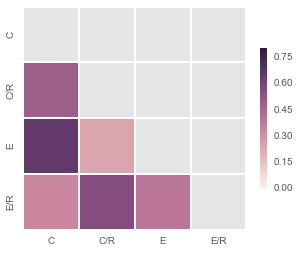

In [31]:
%matplotlib inline
corr = response.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=0.8, vmin = 0.0,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.savefig('response.eps', bbox_inches='tight')

# Predictor Correlation Map

Here we look at the feature correlation before we proceed to the model. Let us also import the topic features from the LDA model.

In [7]:
topic_pd = pd.read_csv('../LDAresults/pix_post_topics.csv')
full_data = pd.merge(data_pd_format,topic_pd, left_on = 'post_id', right_on = 'post_id');

Now create a new dataframe consisting only the predictor variables

In [11]:
predictors = full_data.ix[:,['hour','daynumber','word_count','ALLCAPS','city','politics', 'women','majorcrime', 'minorcrime','sex','year','video','viral','number','topic1','topic2','topic3','topic4','topic5','topic6','topic7','topic8']]

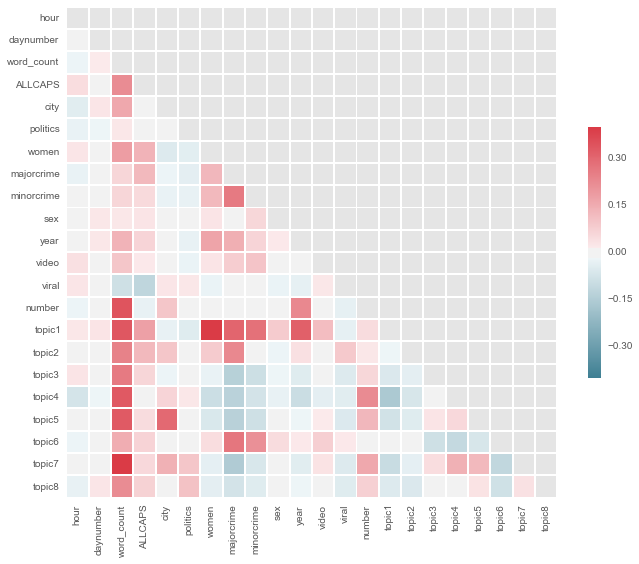

In [12]:
%matplotlib inline
corr = predictors.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.4,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

plt.savefig('predictor_correlation.png', bbox_inches='tight')

In [51]:
full_data.to_csv('pix_full_data_with_topics_features.csv',index = False)

In [17]:
predictors = full_data.ix[:,['hour','daynumber','word_count','ALLCAPS','politics','sex','video','viral','number','topic1','topic2','topic3','topic4','topic5','topic6','topic7','topic8']]

In [18]:
predictors.rename(columns = {'daynumber':'day','word_count':'word count','politics':'Key:Politics','sex':'Key:sex','video':'Key:video','viral':'Key:viral','number':'Key:number'},inplace = True)

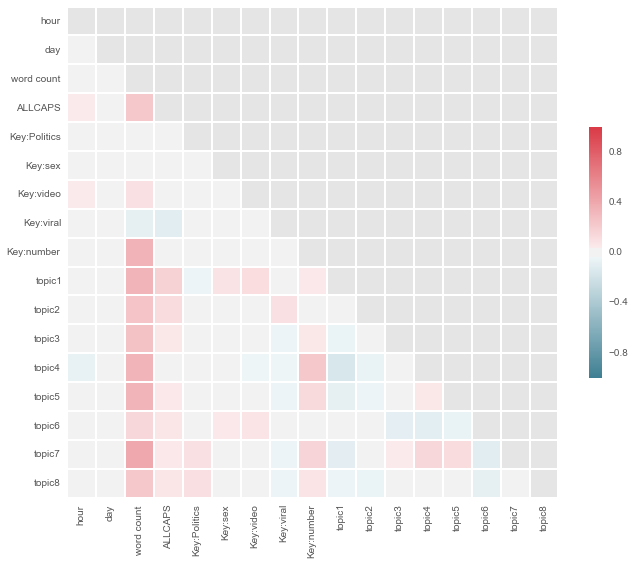

In [20]:
%matplotlib inline
corr = predictors.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

plt.savefig('predictor_correlation.eps', bbox_inches='tight')